In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


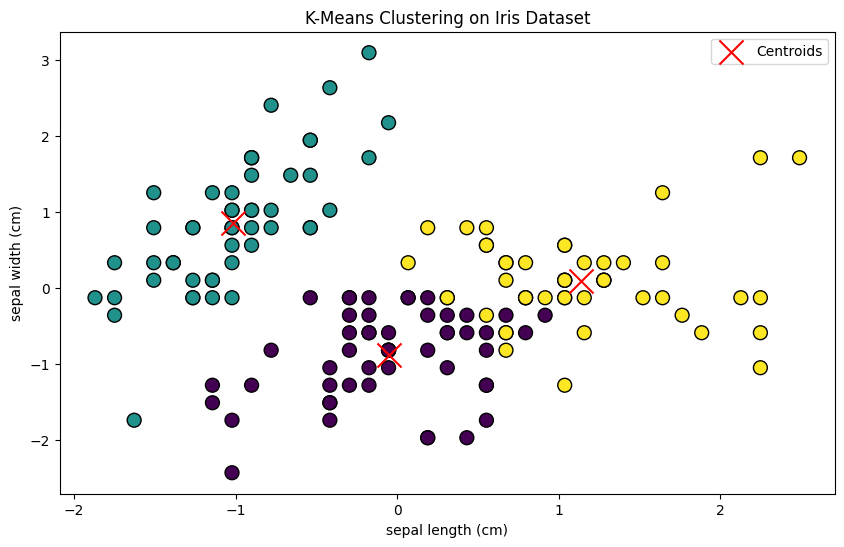

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='x')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()

In [8]:
from scipy.stats import mode

labels = np.zeros_like(y_kmeans)
for i in range(3):
    mask = (y_kmeans == i)
    labels[mask] = mode(y[mask])[0]

In [9]:
accuracy = accuracy_score(y, labels)
print(f"Accuracy of K-Means Clustering: {accuracy:.4f}")

Accuracy of K-Means Clustering: 0.8333


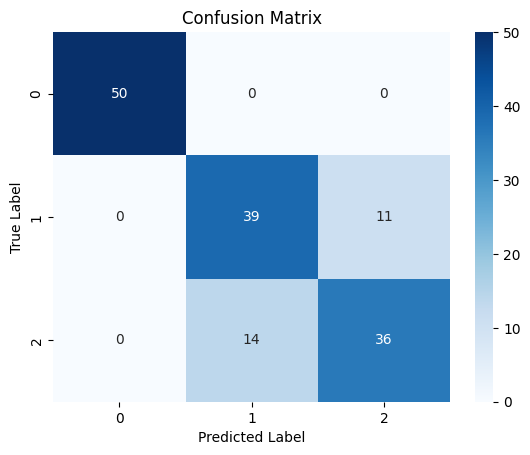

In [10]:
conf_matrix = confusion_matrix(y, labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()